In [1]:
import numpy as np
import pandas as pd
import datetime
import operator
import random
import math
import time
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Getting data from CSSE John Hopkins University Github

df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')


In [3]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,750,766,773,782,789,795,803,820,832,842
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,743,743,745,745,747,748,750,751,751,752
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,27,27,27,30,35,35,35,36,36,36


In [4]:
df_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,58,60,64,68,72,85,90,95,104,106
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,30,30,31,31,31,31,31,31,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,437,444,450,453,459,463,465,470,476,483
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,41,42,42,43,44,45,45,46,46,47
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [5]:
df_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,228,252,260,310,331,345,397,421,458,468
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,431,455,470,488,519,531,543,570,595,605
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1651,1702,1779,1821,1872,1936,1998,2067,2197,2323
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,398,423,468,468,472,493,499,514,521,526
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,6,7,7,11,11,11,11,11,11,11


In [6]:
# Extracting columns
cols = df_confirmed.keys()
print(cols)

confirmed = df_confirmed.loc[:, cols[4]:cols[-1]]
deaths = df_deaths.loc[:, cols[4]:cols[-1]]
recovered = df_recovered.loc[:, cols[4]:cols[-1]]

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/28/20', '4/29/20', '4/30/20', '5/1/20', '5/2/20', '5/3/20', '5/4/20',
       '5/5/20', '5/6/20', '5/7/20'],
      dtype='object', length=111)


In [7]:
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
0,0,0,0,0,0,0,0,0,0,0,...,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563
1,0,0,0,0,0,0,0,0,0,0,...,750,766,773,782,789,795,803,820,832,842
2,0,0,0,0,0,0,0,0,0,0,...,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182
3,0,0,0,0,0,0,0,0,0,0,...,743,743,745,745,747,748,750,751,751,752
4,0,0,0,0,0,0,0,0,0,0,...,27,27,27,30,35,35,35,36,36,36


In [8]:
#total confirmed, deaths, recovered caes and mortality rate (death_sum/confirmed cases)

dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []
total_recovered = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recovered[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [9]:
print(confirmed_sum, recovered_sum, world_cases, mortality_rate)

3845718 1284741 [555, 654, 941, 1434, 2118, 2927, 5578, 6166, 8234, 9927, 12038, 16787, 19881, 23892, 27635, 30794, 34391, 37120, 40150, 42762, 44802, 45221, 60368, 66885, 69030, 71224, 73258, 75136, 75639, 76197, 76819, 78572, 78958, 79561, 80406, 81388, 82746, 84112, 86011, 88369, 90306, 92840, 95120, 97886, 101801, 105847, 109821, 113590, 118620, 125875, 128352, 145219, 156116, 167466, 181603, 197113, 214846, 242616, 272247, 304555, 337018, 378282, 418079, 467723, 529701, 593423, 660824, 720285, 782490, 857608, 932638, 1013458, 1095876, 1176059, 1249737, 1321427, 1396438, 1480200, 1565538, 1657929, 1736025, 1835145, 1905157, 1975557, 2055423, 2151792, 2239628, 2317234, 2400776, 2471727, 2549038, 2624602, 2708403, 2795731, 2881140, 2955033, 3023722, 3097229, 3172287, 3256910, 3343777, 3427584, 3506729, 3583055, 3662691, 3755341, 3845718] [0.03063063063063063, 0.027522935779816515, 0.02763018065887354, 0.029288702928870293, 0.02644003777148253, 0.02801503245644004, 0.02348512011473646

In [10]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)

In [11]:
days_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [12]:
world_cases

array([[    555],
       [    654],
       [    941],
       [   1434],
       [   2118],
       [   2927],
       [   5578],
       [   6166],
       [   8234],
       [   9927],
       [  12038],
       [  16787],
       [  19881],
       [  23892],
       [  27635],
       [  30794],
       [  34391],
       [  37120],
       [  40150],
       [  42762],
       [  44802],
       [  45221],
       [  60368],
       [  66885],
       [  69030],
       [  71224],
       [  73258],
       [  75136],
       [  75639],
       [  76197],
       [  76819],
       [  78572],
       [  78958],
       [  79561],
       [  80406],
       [  81388],
       [  82746],
       [  84112],
       [  86011],
       [  88369],
       [  90306],
       [  92840],
       [  95120],
       [  97886],
       [ 101801],
       [ 105847],
       [ 109821],
       [ 113590],
       [ 118620],
       [ 125875],
       [ 128352],
       [ 145219],
       [ 156116],
       [ 167466],
       [ 181603],
       [ 1

In [13]:
total_deaths

array([[    17],
       [    18],
       [    26],
       [    42],
       [    56],
       [    82],
       [   131],
       [   133],
       [   171],
       [   213],
       [   259],
       [   362],
       [   426],
       [   492],
       [   564],
       [   634],
       [   719],
       [   806],
       [   906],
       [  1013],
       [  1113],
       [  1118],
       [  1371],
       [  1523],
       [  1666],
       [  1770],
       [  1868],
       [  2007],
       [  2122],
       [  2247],
       [  2251],
       [  2458],
       [  2469],
       [  2629],
       [  2708],
       [  2770],
       [  2814],
       [  2872],
       [  2941],
       [  2996],
       [  3085],
       [  3160],
       [  3254],
       [  3347],
       [  3459],
       [  3558],
       [  3801],
       [  3987],
       [  4263],
       [  4614],
       [  4722],
       [  5408],
       [  5830],
       [  6472],
       [  7150],
       [  7956],
       [  8823],
       [  9946],
       [ 11422

In [14]:
total_recovered

array([[     28],
       [     30],
       [     36],
       [     39],
       [     52],
       [     61],
       [    107],
       [    126],
       [    143],
       [    222],
       [    284],
       [    472],
       [    623],
       [    852],
       [   1124],
       [   1487],
       [   2011],
       [   2616],
       [   3244],
       [   3946],
       [   4683],
       [   5150],
       [   6295],
       [   8058],
       [   9395],
       [  10865],
       [  12583],
       [  14352],
       [  16121],
       [  18177],
       [  18890],
       [  22886],
       [  23394],
       [  25227],
       [  27905],
       [  30384],
       [  33277],
       [  36711],
       [  39782],
       [  42716],
       [  45602],
       [  48228],
       [  51170],
       [  53796],
       [  55865],
       [  58358],
       [  60694],
       [  62494],
       [  64404],
       [  67003],
       [  68324],
       [  70251],
       [  72624],
       [  76034],
       [  78088],
       [  

In [15]:
days_in_future = 10
future_forecast = np.array([i for i in range( len(dates) + days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-10]

In [16]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [17]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days = i)).strftime('%m/%d/%Y'))
    
print(future_forecast_dates)

['01/22/2020', '01/23/2020', '01/24/2020', '01/25/2020', '01/26/2020', '01/27/2020', '01/28/2020', '01/29/2020', '01/30/2020', '01/31/2020', '02/01/2020', '02/02/2020', '02/03/2020', '02/04/2020', '02/05/2020', '02/06/2020', '02/07/2020', '02/08/2020', '02/09/2020', '02/10/2020', '02/11/2020', '02/12/2020', '02/13/2020', '02/14/2020', '02/15/2020', '02/16/2020', '02/17/2020', '02/18/2020', '02/19/2020', '02/20/2020', '02/21/2020', '02/22/2020', '02/23/2020', '02/24/2020', '02/25/2020', '02/26/2020', '02/27/2020', '02/28/2020', '02/29/2020', '03/01/2020', '03/02/2020', '03/03/2020', '03/04/2020', '03/05/2020', '03/06/2020', '03/07/2020', '03/08/2020', '03/09/2020', '03/10/2020', '03/11/2020', '03/12/2020', '03/13/2020', '03/14/2020', '03/15/2020', '03/16/2020', '03/17/2020', '03/18/2020', '03/19/2020', '03/20/2020', '03/21/2020', '03/22/2020', '03/23/2020', '03/24/2020', '03/25/2020', '03/26/2020', '03/27/2020', '03/28/2020', '03/29/2020', '03/30/2020', '03/31/2020', '04/01/2020', '04/0

In [18]:
latest_confirmed = df_confirmed[dates[-1]]
latest_deaths = df_deaths[dates[-1]]
latest_recovered = df_recovered[dates[-1]]
print(latest_confirmed)
print(latest_deaths)
print(latest_recovered)

0      3563
1       842
2      5182
3       752
4        36
       ... 
261       6
262     187
263      25
264       8
265     461
Name: 5/7/20, Length: 266, dtype: int64
0      106
1       31
2      483
3       47
4        2
      ... 
261      0
262      4
263      5
264      1
265     12
Name: 5/7/20, Length: 266, dtype: int64
0       468
1       605
2      2323
3       526
4        11
       ... 
247       5
248       4
249       1
250       0
251       0
Name: 5/7/20, Length: 252, dtype: int64


In [19]:
unique_countries = list(df_confirmed['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Diamond Princess',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq'

In [20]:
# total confirmed cases for each country

country_confirmed_cases = []
no_cases = []

for i in unique_countries:
    cases = latest_confirmed[df_confirmed['Country/Region']==i].sum()
    if cases>0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[df_confirmed['Country/Region']==unique_countries[i]].sum()
    

In [21]:
country_confirmed_cases

[1257023,
 221447,
 215858,
 207977,
 177160,
 174918,
 169430,
 135773,
 133721,
 103135,
 83975,
 66201,
 58526,
 56351,
 51420,
 41973,
 33731,
 30298,
 30126,
 29616,
 26715,
 24644,
 24623,
 24581,
 22385,
 20939,
 20168,
 18890,
 16381,
 16240,
 15752,
 15477,
 15047,
 14499,
 13691,
 12776,
 12425,
 10822,
 10343,
 10281,
 9848,
 9456,
 9095,
 8232,
 8034,
 8031,
 7981,
 7868,
 6913,
 6567,
 6467,
 5673,
 5548,
 5371,
 5182,
 4605,
 4578,
 4199,
 3859,
 3563,
 3526,
 3150,
 3091,
 2992,
 2958,
 2884,
 2678,
 2543,
 2298,
 2267,
 2204,
 2125,
 2081,
 2027,
 1927,
 1829,
 1801,
 1729,
 1720,
 1685,
 1572,
 1571,
 1492,
 1490,
 1449,
 1445,
 1433,
 1133,
 1026,
 930,
 928,
 909,
 895,
 889,
 863,
 861,
 842,
 832,
 824,
 784,
 781,
 765,
 752,
 736,
 712,
 695,
 684,
 650,
 648,
 622,
 615,
 607,
 564,
 504,
 494,
 488,
 486,
 480,
 462,
 461,
 440,
 439,
 381,
 375,
 332,
 324,
 288,
 271,
 264,
 253,
 231,
 218,
 193,
 191,
 189,
 187,
 176,
 153,
 153,
 141,
 140,
 135,
 129,
 1

In [22]:
#no. of cases per country/region

print("Confirmed cases by country/region:")

for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed cases by country/region:
US: 1257023 cases
Spain: 221447 cases
Italy: 215858 cases
United Kingdom: 207977 cases
Russia: 177160 cases
France: 174918 cases
Germany: 169430 cases
Brazil: 135773 cases
Turkey: 133721 cases
Iran: 103135 cases
China: 83975 cases
Canada: 66201 cases
Peru: 58526 cases
India: 56351 cases
Belgium: 51420 cases
Netherlands: 41973 cases
Saudi Arabia: 33731 cases
Ecuador: 30298 cases
Switzerland: 30126 cases
Mexico: 29616 cases
Portugal: 26715 cases
Pakistan: 24644 cases
Sweden: 24623 cases
Chile: 24581 cases
Ireland: 22385 cases
Singapore: 20939 cases
Belarus: 20168 cases
Qatar: 18890 cases
Israel: 16381 cases
United Arab Emirates: 16240 cases
Austria: 15752 cases
Japan: 15477 cases
Poland: 15047 cases
Romania: 14499 cases
Ukraine: 13691 cases
Indonesia: 12776 cases
Bangladesh: 12425 cases
Korea, South: 10822 cases
Philippines: 10343 cases
Denmark: 10281 cases
Serbia: 9848 cases
Colombia: 9456 cases
Dominican Republic: 9095 cases
South Africa: 8232 cases
N

In [23]:
unique_provinces = list(df_confirmed['Province/State'].unique())

province_confirmed_cases = []
no_cases = []
for i in unique_provinces:
    cases = latest_confirmed[df_deaths['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_provinces.remove(i)
    

In [24]:
unique_provinces

['Australian Capital Territory',
 'New South Wales',
 'Northern Territory',
 'Queensland',
 'South Australia',
 'Tasmania',
 'Victoria',
 'Western Australia',
 'Alberta',
 'British Columbia',
 'Grand Princess',
 'Manitoba',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Nova Scotia',
 'Ontario',
 'Prince Edward Island',
 'Quebec',
 'Saskatchewan',
 'Anhui',
 'Beijing',
 'Chongqing',
 'Fujian',
 'Gansu',
 'Guangdong',
 'Guangxi',
 'Guizhou',
 'Hainan',
 'Hebei',
 'Heilongjiang',
 'Henan',
 'Hong Kong',
 'Hubei',
 'Hunan',
 'Inner Mongolia',
 'Jiangsu',
 'Jiangxi',
 'Jilin',
 'Liaoning',
 'Macau',
 'Ningxia',
 'Qinghai',
 'Shaanxi',
 'Shandong',
 'Shanghai',
 'Shanxi',
 'Sichuan',
 'Tianjin',
 'Tibet',
 'Xinjiang',
 'Yunnan',
 'Zhejiang',
 'Faroe Islands',
 'Greenland',
 'French Guiana',
 'French Polynesia',
 'Guadeloupe',
 'Mayotte',
 'New Caledonia',
 'Reunion',
 'Saint Barthelemy',
 'St Martin',
 'Martinique',
 'Aruba',
 'Curacao',
 'Sint Maarten',
 'Bermuda',
 'Cayman Islands',
 '

In [25]:
for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases')

Australian Capital Territory: 107 cases
New South Wales: 3047 cases
Northern Territory: 29 cases
Queensland: 1045 cases
South Australia: 439 cases
Tasmania: 227 cases
Victoria: 1467 cases
Western Australia: 552 cases
Alberta: 6017 cases
British Columbia: 2288 cases
Grand Princess: 13 cases
Manitoba: 283 cases
New Brunswick: 120 cases
Newfoundland and Labrador: 261 cases
Nova Scotia: 1007 cases
Ontario: 20388 cases
Prince Edward Island: 27 cases
Quebec: 35249 cases
Saskatchewan: 531 cases
Anhui: 991 cases
Beijing: 593 cases
Chongqing: 579 cases
Fujian: 356 cases
Gansu: 139 cases
Guangdong: 1589 cases
Guangxi: 254 cases
Guizhou: 147 cases
Hainan: 168 cases
Hebei: 328 cases
Heilongjiang: 944 cases
Henan: 1276 cases
Hong Kong: 1044 cases
Hubei: 68128 cases
Hunan: 1019 cases
Inner Mongolia: 201 cases
Jiangsu: 653 cases
Jiangxi: 937 cases
Jilin: 113 cases
Liaoning: 146 cases
Macau: 45 cases
Ningxia: 75 cases
Qinghai: 18 cases
Shaanxi: 308 cases
Shandong: 788 cases
Shanghai: 657 cases
Shanxi:

In [26]:
nan_indices = []

for i in range(len(unique_provinces)):
    if type(unique_provinces[i])==float:
        nan_indices.append(i)
        
unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)
    

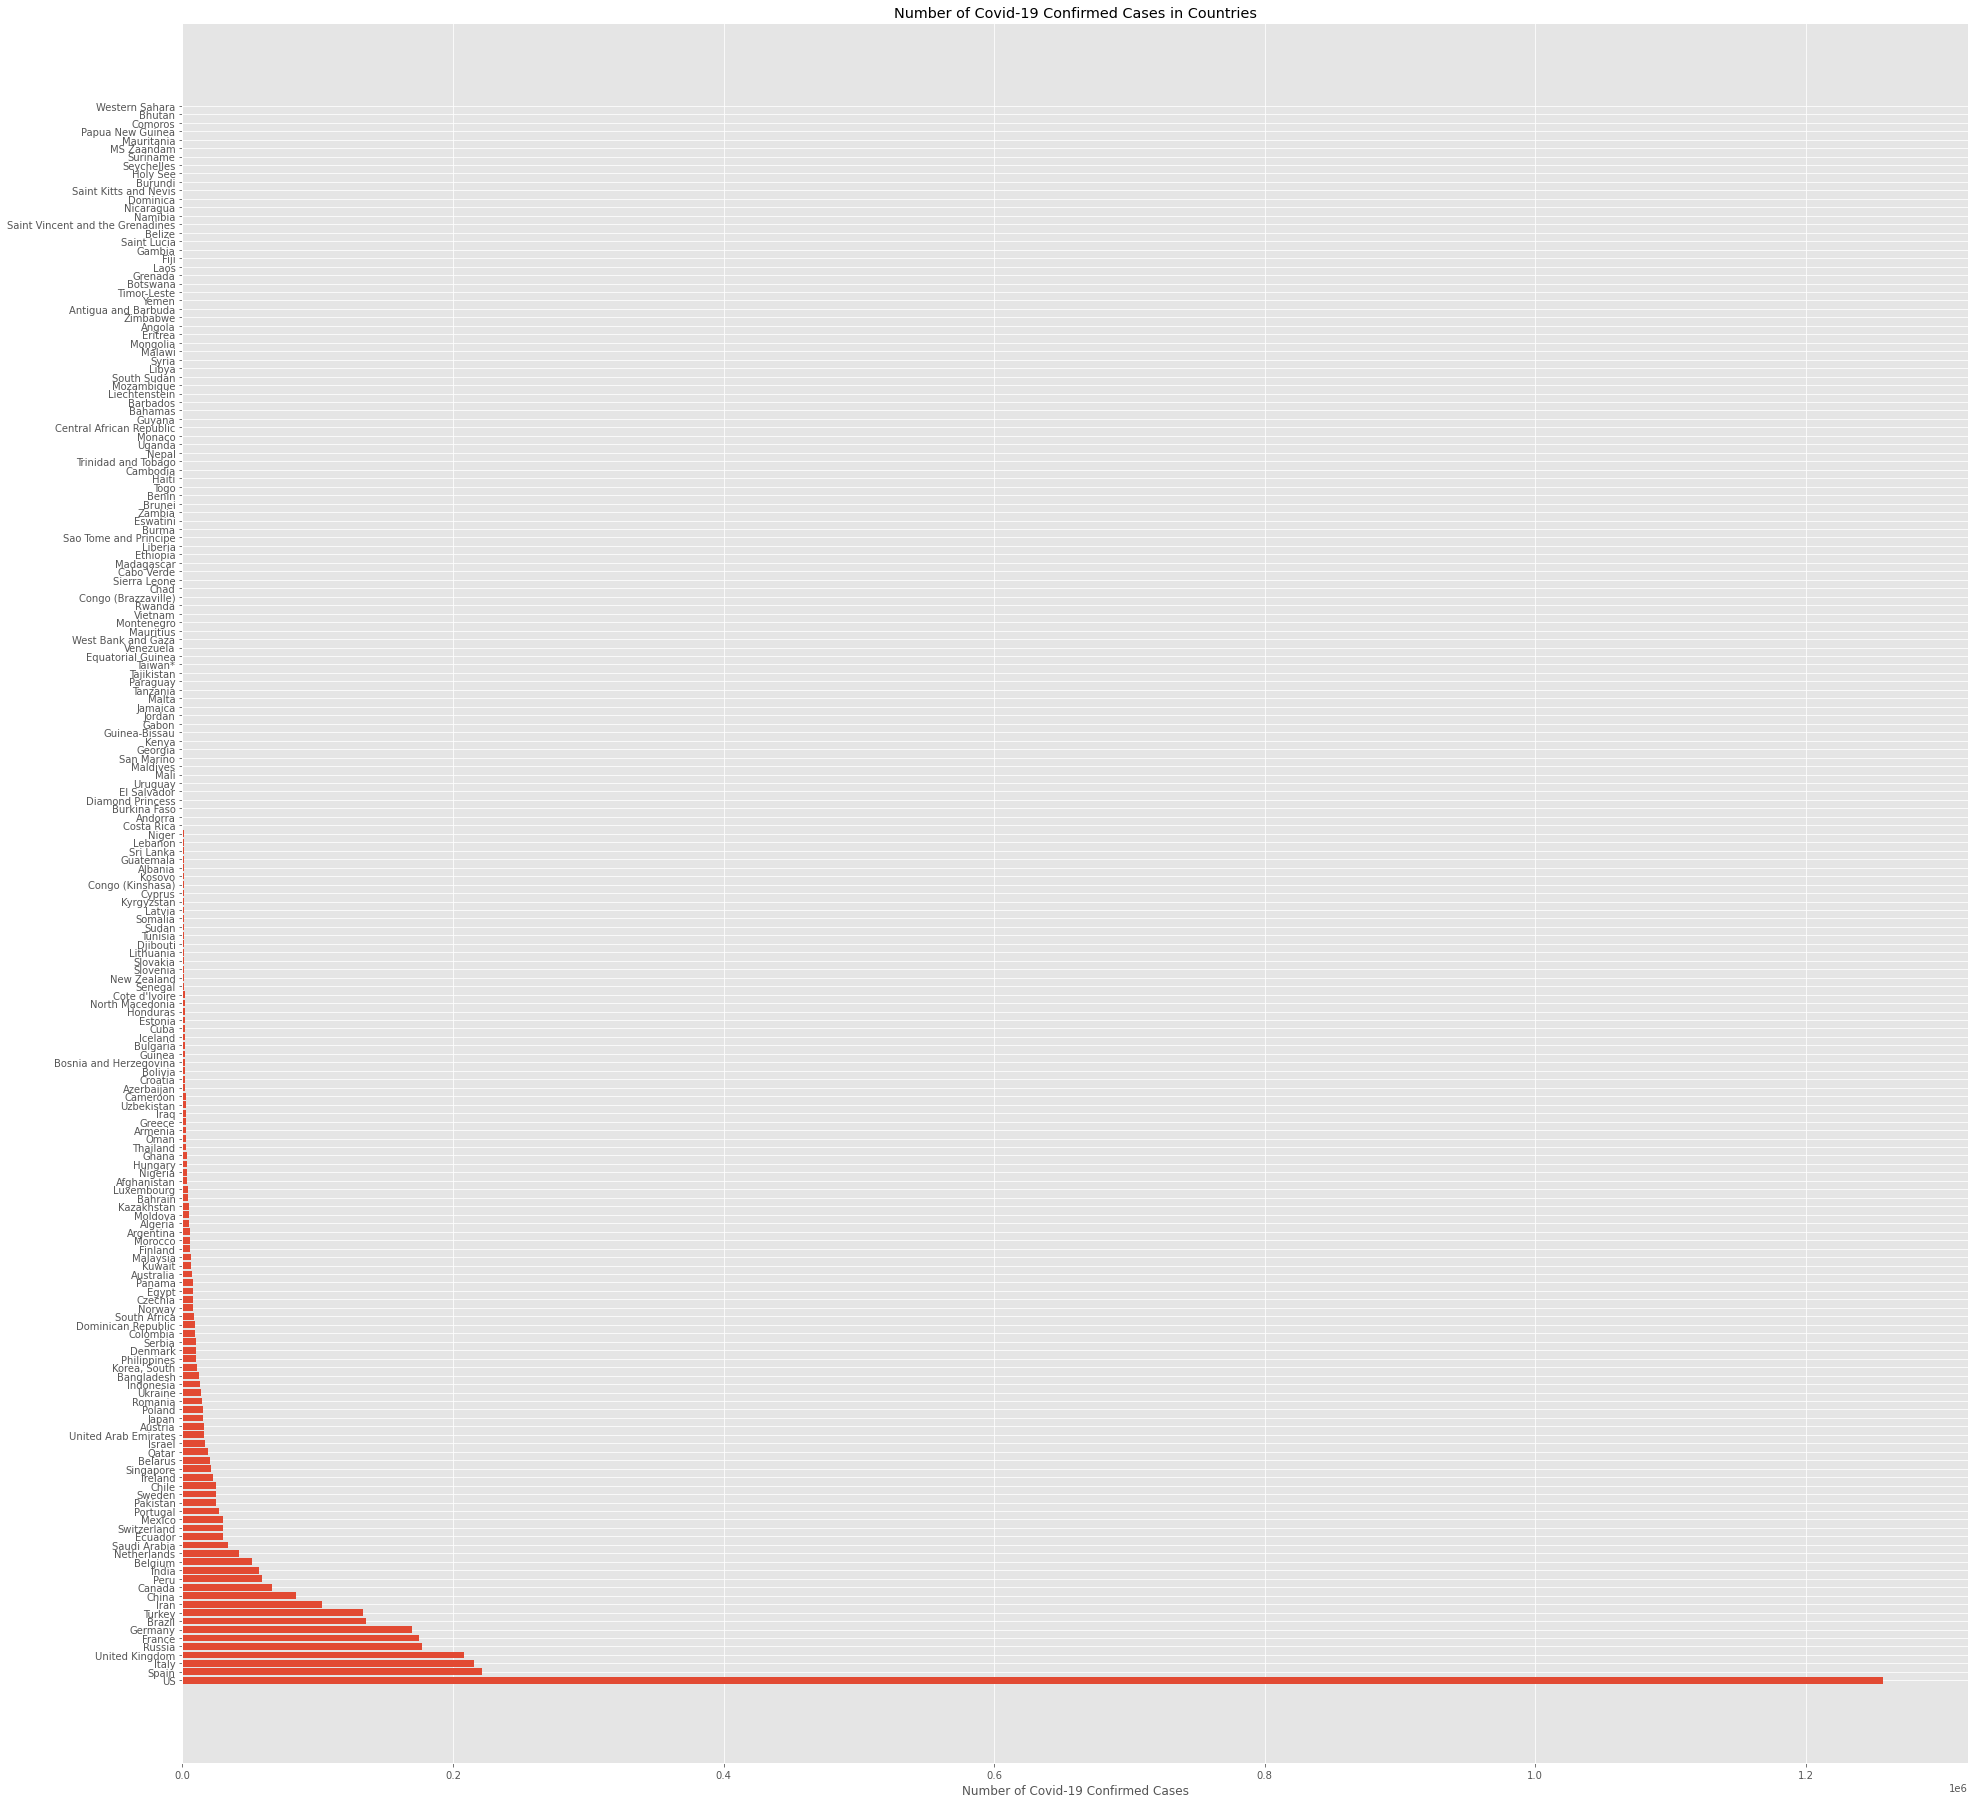

In [27]:
plt.figure(figsize = (32, 32))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries')
plt.xlabel('Number of Covid-19 Confirmed Cases')
plt.show()

In [28]:
# only showing 15 countries with most confirmed cases

visual_unique_countries = []
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[15:])
for i in range(len(country_confirmed_cases[:15])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

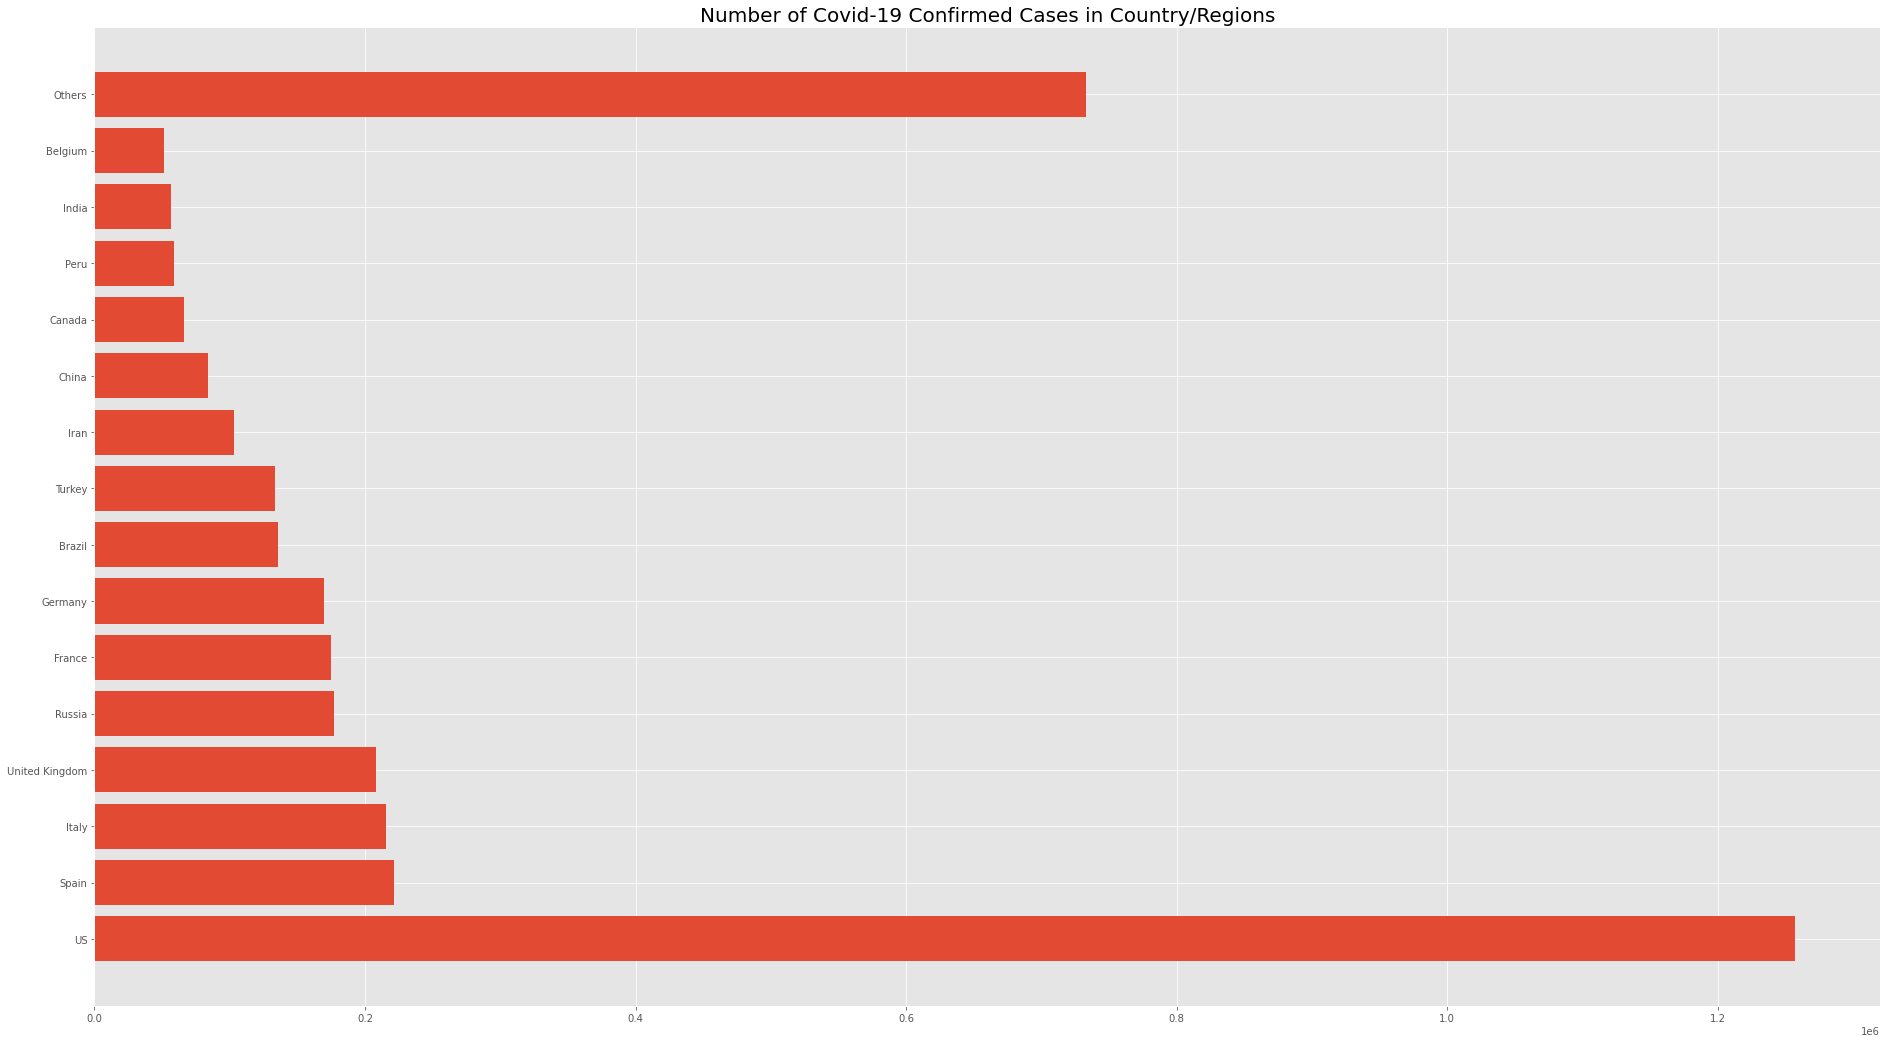

In [29]:
plt.figure(figsize = (32, 18))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Country/Regions', size=20)
plt.show()

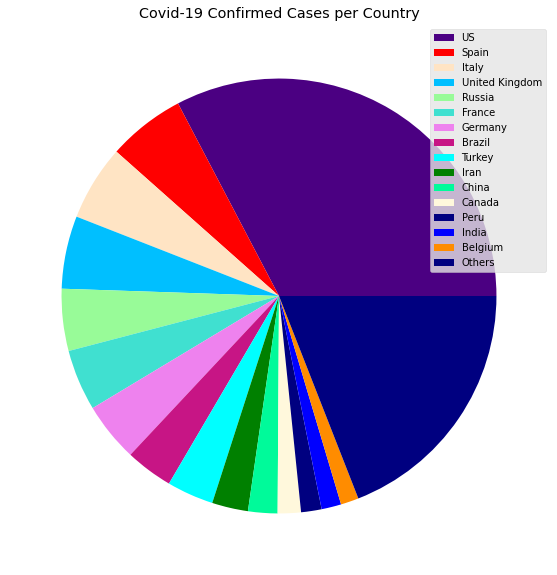

In [30]:
# piechart for confirmed cases in 15 different countries

c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(10,10))
plt.title('Covid-19 Confirmed Cases per Country')
plt.pie(visual_confirmed_cases, colors=c)
plt.legend(visual_unique_countries, loc='best')
plt.show()

In [31]:
days_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [32]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.16, shuffle=False)

In [33]:
#Build SVM Model

kernel = ['poly', 'sigmoid', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma': gamma, 'epsilon': epsilon, 'shrinking': shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring = 'neg_mean_squared_error', cv=3, return_train_score = True, n_jobs = -1, n_iter=40, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed).score(X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  5.4min finished
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-29643001769.243465

In [34]:
svm_search.best_params_

{'shrinking': True, 'kernel': 'poly', 'gamma': 1, 'epsilon': 0.01, 'C': 10}

In [35]:
svm_confirmed = svm_search.best_estimator_
svm_confirmed

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=1,
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [36]:
svm_pred = svm_confirmed.predict(future_forecast)

In [37]:
svm_pred

array([5.54989983e+02, 5.58190837e+02, 5.80596814e+02, 6.41413038e+02,
       7.59844633e+02, 9.55096720e+02, 1.24637442e+03, 1.65288287e+03,
       2.19382718e+03, 2.88841248e+03, 3.75584388e+03, 4.81532652e+03,
       6.08606551e+03, 7.58726600e+03, 9.33813308e+03, 1.13578719e+04,
       1.36656876e+04, 1.62807852e+04, 1.92223699e+04, 2.25096468e+04,
       2.61618212e+04, 3.01980980e+04, 3.46376823e+04, 3.94997794e+04,
       4.48035942e+04, 5.05683321e+04, 5.68131981e+04, 6.35573972e+04,
       7.08201348e+04, 7.86206157e+04, 8.69780452e+04, 9.59116284e+04,
       1.05440571e+05, 1.15584076e+05, 1.26361352e+05, 1.37791601e+05,
       1.49894030e+05, 1.62687843e+05, 1.76192245e+05, 1.90426442e+05,
       2.05409639e+05, 2.21161042e+05, 2.37699854e+05, 2.55045281e+05,
       2.73216529e+05, 2.92232802e+05, 3.12113305e+05, 3.32877244e+05,
       3.54543824e+05, 3.77132251e+05, 4.00661727e+05, 4.25151461e+05,
       4.50620655e+05, 4.77088515e+05, 5.04574248e+05, 5.33097057e+05,
      

MAE:  155320.45489547375
MSE:  28027823548.598515


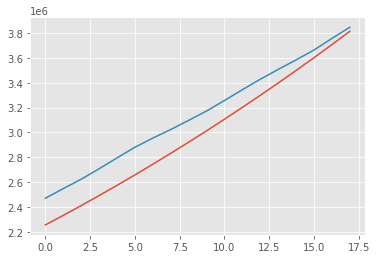

In [38]:
#checking against testing data

svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('MAE: ',mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE: ',mean_squared_error(svm_test_pred, y_test_confirmed))

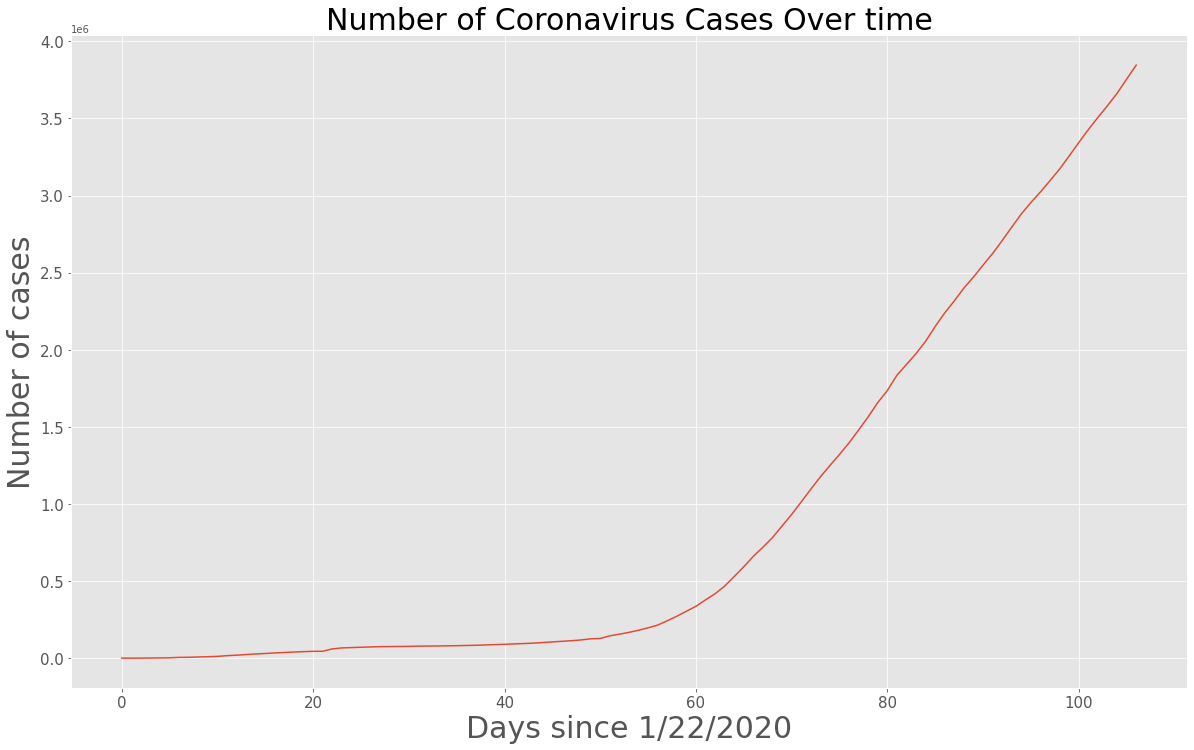

In [51]:
#Total no. of coronavirus cases overtime

plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, world_cases)
plt.title('Number of Coronavirus Cases Over time', size=30)
plt.xlabel('Days since 1/22/2020',size=30)
plt.ylabel('Number of cases',size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

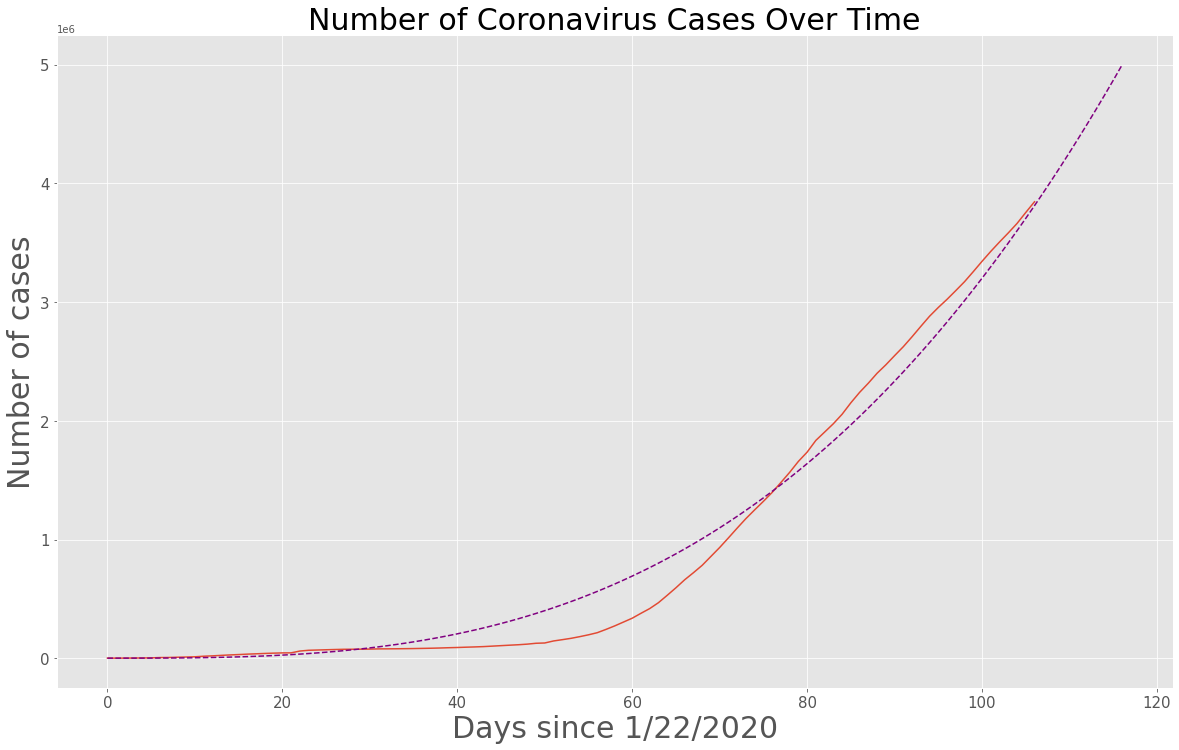

In [40]:
#Confirmed vs. Predicted

plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, svm_pred, linestyle='dashed', color='purple')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days since 1/22/2020',size=30)
plt.ylabel('Number of cases',size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [41]:
#Predictions for next 10 days using SVM

print('SVM Future Predictions: ')
set(zip(future_forecast_dates[-10:], svm_pred[-10:]))

SVM Future Predictions: 


{('05/08/2020', 3921738.6540454985),
 ('05/09/2020', 4032709.0524829985),
 ('05/10/2020', 4145753.6149829985),
 ('05/11/2020', 4260891.529045498),
 ('05/12/2020', 4378142.005607998),
 ('05/13/2020', 4497524.255607998),
 ('05/14/2020', 4619057.474357998),
 ('05/15/2020', 4742760.880607998),
 ('05/16/2020', 4868653.661857998),
 ('05/17/2020', 4996755.036857998)}

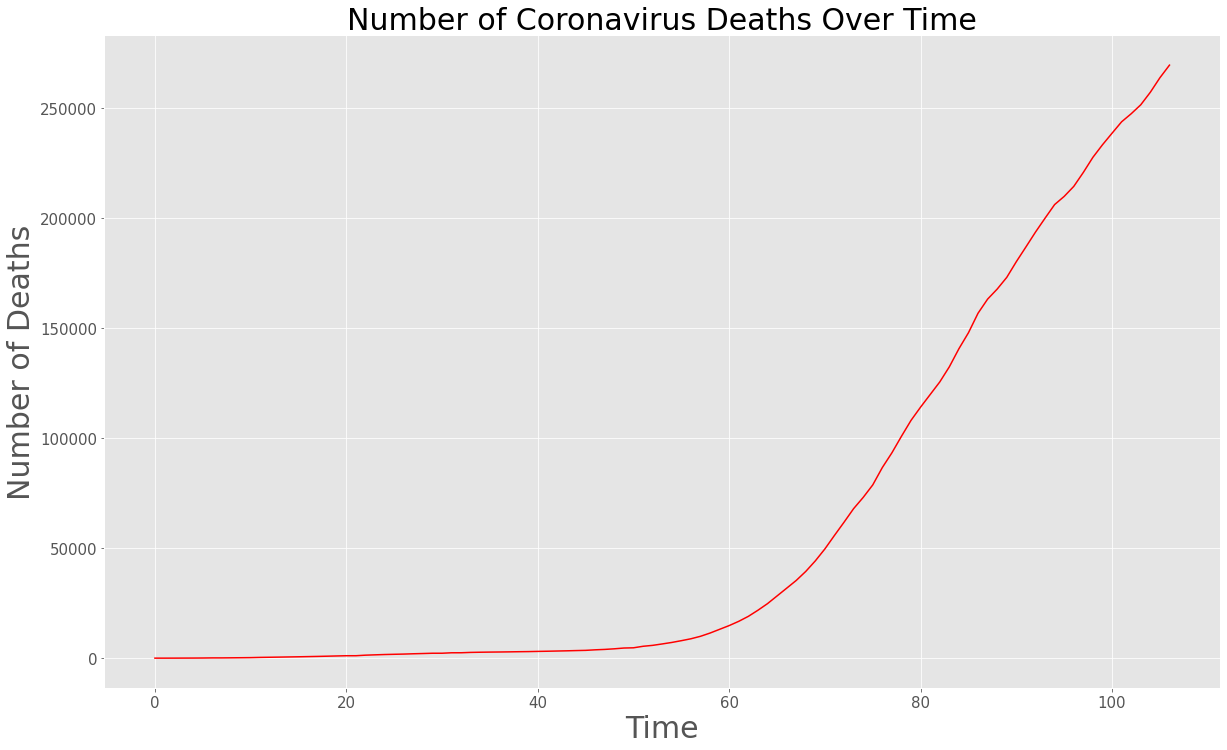

In [42]:
# Total Deaths Over time

plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('Number of Coronavirus Deaths Over Time',size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Deaths', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

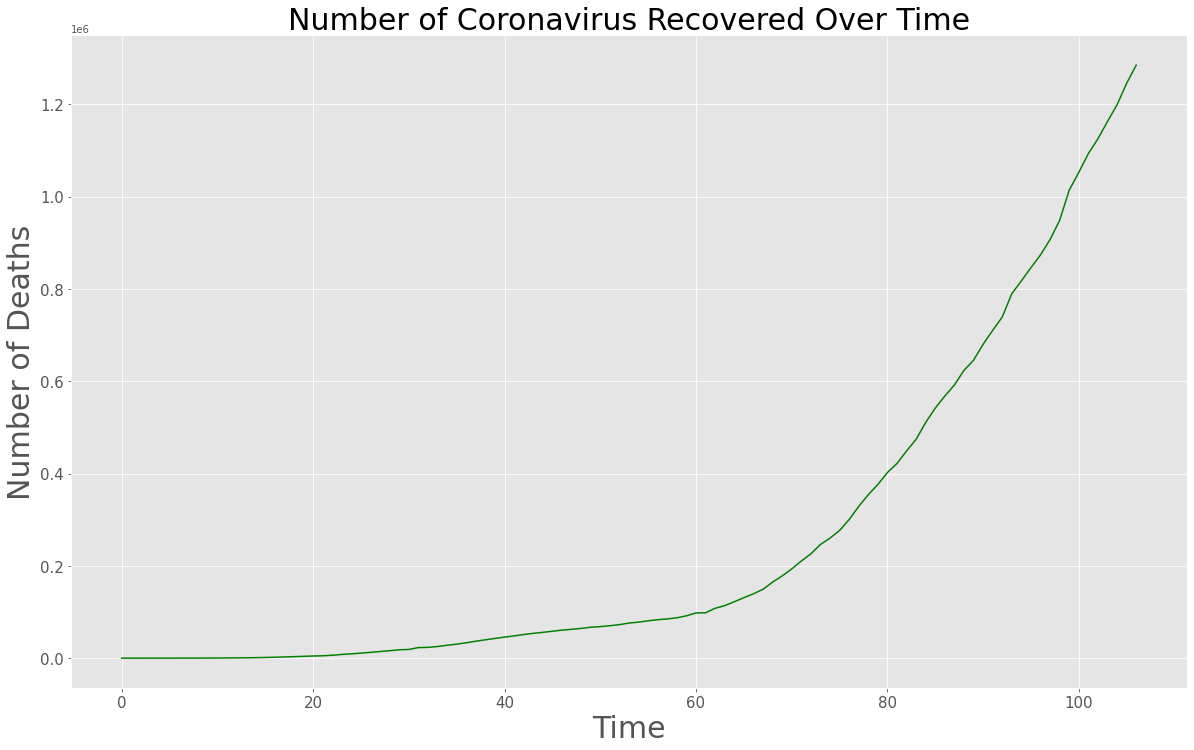

In [43]:
# Total Recovered Over time

plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, total_recovered, color='green')
plt.title('Number of Coronavirus Recovered Over Time',size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Deaths', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

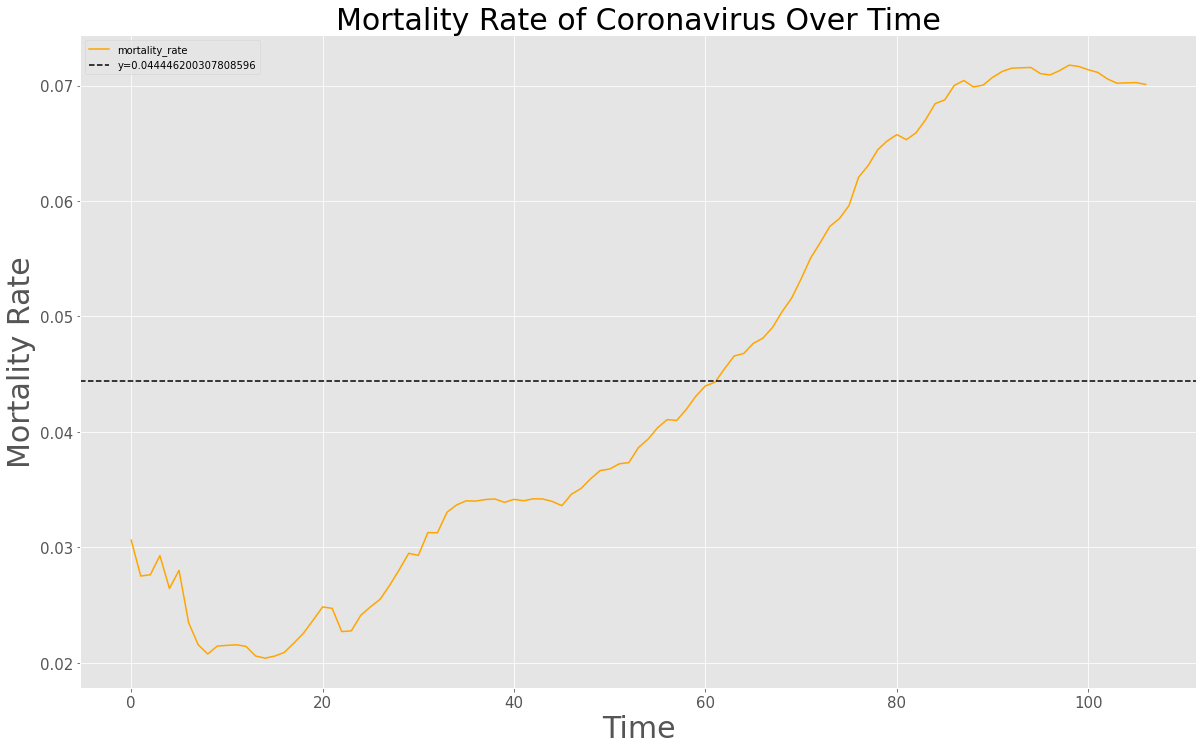

In [44]:
#Mortality Rate

mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y=mean_mortality_rate, linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time',size=30)
plt.legend(['mortality_rate','y='+str(mean_mortality_rate)])
plt.xlabel('Time', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

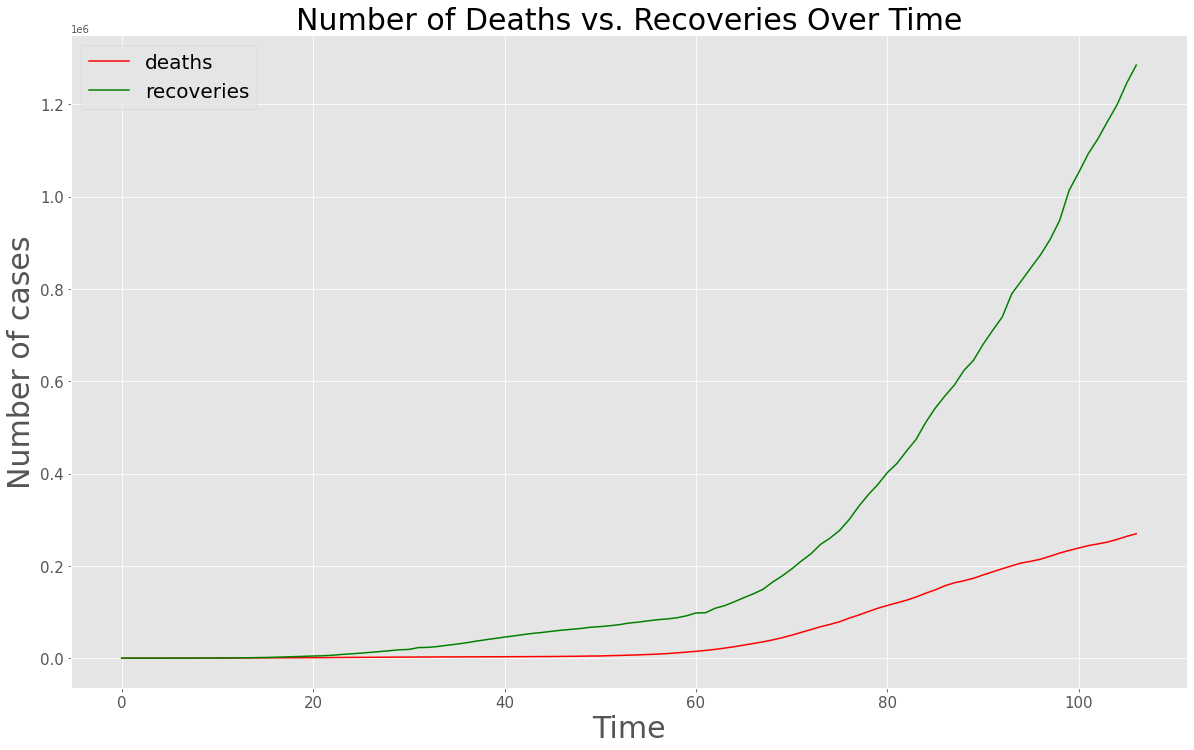

In [45]:
# No. of deaths vs recoveries

plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.title('Number of Deaths vs. Recoveries Over Time',size=30)
plt.legend(['deaths','recoveries'],loc='best',fontsize=20)
plt.xlabel('Time', size=30)
plt.ylabel('Number of cases',size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()